<a href="https://colab.research.google.com/github/hitanshi08/Oasisinfobyte_data_analytics/blob/main/Exploratory_Data_Analysis_(EDA)_on_Retail_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA LOADING

In [51]:
#load the dataset

import pandas as pd
retail_sales = pd.read_csv('/content/retail_sales_dataset.csv')

DATA INSPECTION

In [52]:
#Display basic info
print(retail_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


In [53]:
#Display few rows of the dataset
print(retail_sales.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


SUMMARY STATISTICS

In [54]:
print(retail_sales.describe())

       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


DATA CLEANING

Handling Missing Values:

In [5]:
# Drop rows with missing values
retail_sales_cleaned = retail_sales.dropna()


# Fill missing values with the mean of the column
retail_sales['Total Amount'].fillna(retail_sales['Total Amount'].mean(), inplace=True)



Removing Duplicates:

In [6]:
# Remove duplicate rows based on all columns
retail_sales_cleaned = retail_sales.drop_duplicates()

# Remove duplicates based on specific columns
retail_sales_cleaned = retail_sales.drop_duplicates(subset=['Price per Unit', 'Total Amount'])


Handling Outliers:

---



In [7]:
# Identify outliers in the 'Price' column using z-scores
z_scores = (retail_sales['Price per Unit'] - retail_sales['Price per Unit'].mean()) / retail_sales['Price per Unit'].std()
outliers = z_scores[abs(z_scores) > 3]

# Remove outliers
retail_sales_cleaned = retail_sales[~retail_sales['Price per Unit'].isin(outliers)]


Handling Incomplete or Inaccurate Data:

In [8]:
# Impute missing values based on other columns or external data
retail_sales['Total Amount'].fillna(retail_sales.groupby('Quantity')['Total Amount'].transform('mean'), inplace=True)

# Drop rows with incomplete data for specific columns
retail_sales_cleaned = retail_sales.dropna(subset=['Price per Unit', 'Total Amount'])


DESCRIPTIVE ANALYSIS

1.UNIVARIATE ANALYSIS

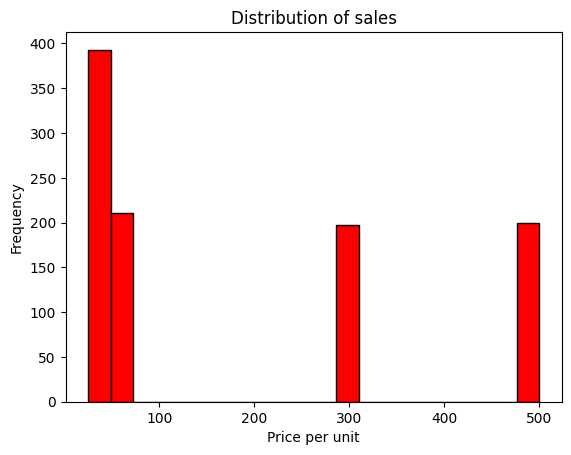

In [9]:
#Visualizing the distribution of the target variable (retail sales) using a histogram.

import matplotlib.pyplot as plt

#Histogram of retail sales
plt.hist(retail_sales['Price per Unit'], bins=20, color='red', edgecolor='black')
plt.title('Distribution of sales')
plt.xlabel('Price per unit')
plt.ylabel('Frequency')
plt.show()

2.BIVARIATE ANALYSIS

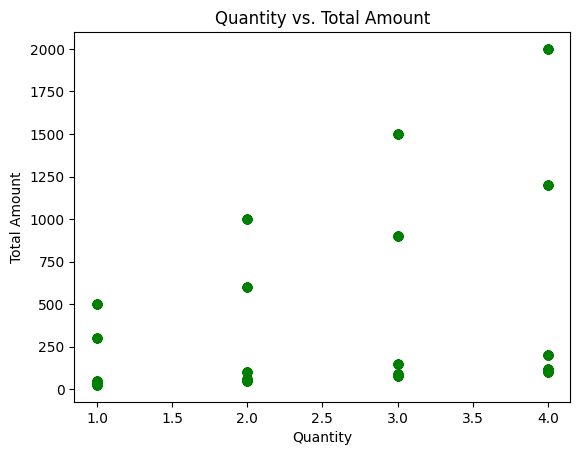

In [10]:
#Explore the relationship between the Quantity and the sales prices using a scatter plot.

# Scatter plot of Quantity vs. price
plt.scatter(retail_sales['Quantity'], retail_sales['Total Amount'], color='green', alpha=0.5)
plt.title('Quantity vs. Total Amount')
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.show()


3.CORRELATION ANALYSIS

In [11]:
# Correlation matrix
#Calculating the correlation matrix to identify correlations between numerical features.
correlation_matrix = retail_sales.corr()
print(correlation_matrix)


                Transaction ID       Age  Quantity  Price per Unit  \
Transaction ID        1.000000  0.065191 -0.026623       -0.060837   
Age                   0.065191  1.000000 -0.023737       -0.038423   
Quantity             -0.026623 -0.023737  1.000000        0.017501   
Price per Unit       -0.060837 -0.038423  0.017501        1.000000   
Total Amount         -0.075034 -0.060568  0.373707        0.851925   

                Total Amount  
Transaction ID     -0.075034  
Age                -0.060568  
Quantity            0.373707  
Price per Unit      0.851925  
Total Amount        1.000000  


<ipython-input-11-e09ecb417e90>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = retail_sales.corr()


TIME SERIES ANALYSIS

In [16]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [36]:
retail_sales.head()

,Transaction ID,Date,Customer ID,Product Category,Quantity,Price per Unit,Total Amount
1970-01-01 00:00:00.000000000,1,2023-11-24,CUST001,Beauty,3,50,150
1970-01-01 00:00:00.000000001,2,2023-02-27,CUST002,Clothing,2,500,1000
1970-01-01 00:00:00.000000002,3,2023-01-13,CUST003,Electronics,1,30,30
1970-01-01 00:00:00.000000003,4,2023-05-21,CUST004,Clothing,1,500,500
1970-01-01 00:00:00.000000004,5,2023-05-06,CUST005,Beauty,2,50,100


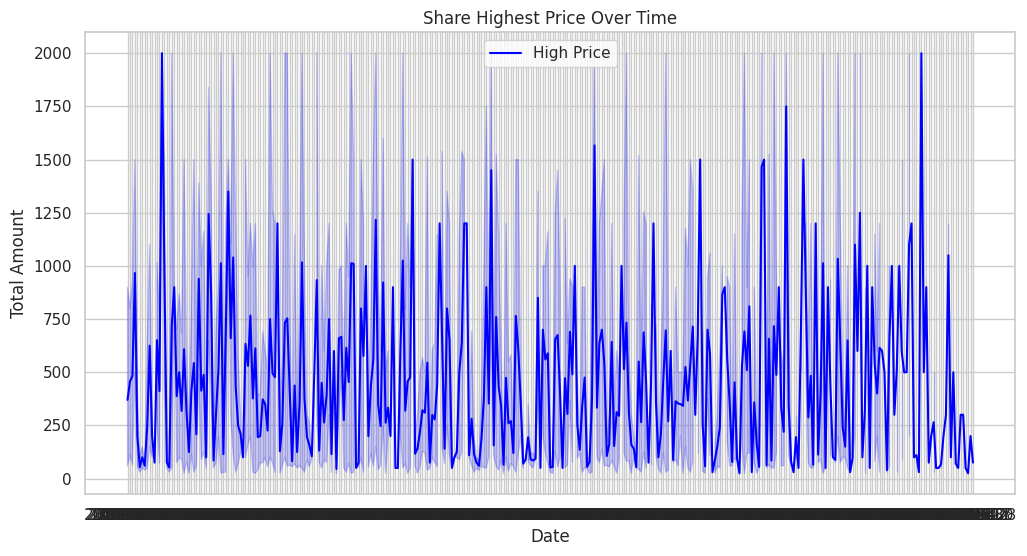

In [37]:

 # Setting the style to whitegrid for a clean background
sns.set(style="whitegrid")

 # Setting the figure size
plt.figure(figsize=(12, 6))

sns.lineplot(data=retail_sales, x='Date', y='Total Amount', label='High Price', color='blue')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.title('Share Highest Price Over Time')

plt.show()

In [38]:
# Convert the index to DatetimeIndex
retail_sales.index = pd.to_datetime(retail_sales.index)

<ipython-input-39-0400f8edcb14>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  retail_sales_resampled = retail_sales.resample('M').mean()


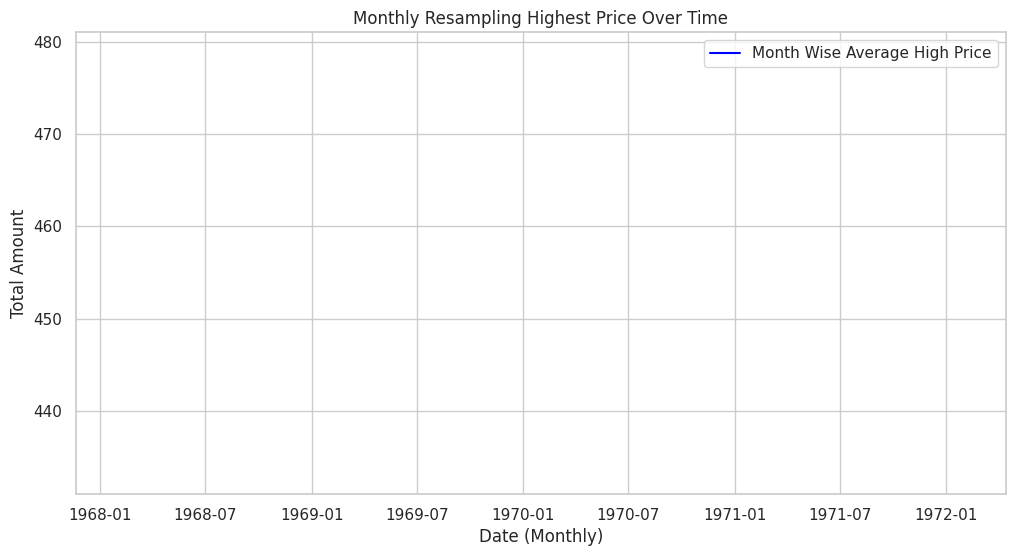

In [39]:

# Resampling to monthly frequency, using mean as an aggregation function
retail_sales_resampled = retail_sales.resample('M').mean()

 # Setting the style to whitegrid for a clean background
sns.set(style="whitegrid")

# Plotting the 'high' column with seaborn, setting x as the resampled 'Date'
plt.figure(figsize=(12, 6))  # Setting the figure size
sns.lineplot(data=retail_sales_resampled, x=retail_sales_resampled.index, y='Total Amount', label='Month Wise Average High Price', color='blue')

# Adding labels and title
plt.xlabel('Date (Monthly)')
plt.ylabel('Total Amount')
plt.title('Monthly Resampling Highest Price Over Time')

plt.show()

CUSTOMER AND PRODUCT ANALYSIS

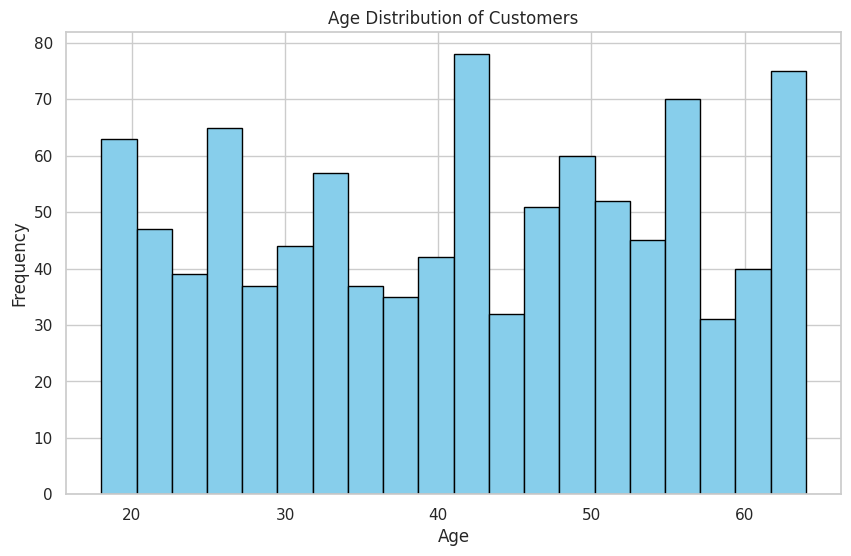

In [57]:
# Age Distribution
plt.figure(figsize=(10, 6))
retail_sales['Age'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

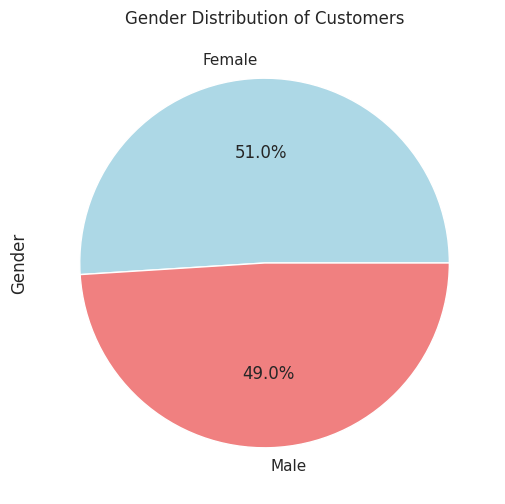

In [58]:
# Gender Distribution
plt.figure(figsize=(6, 6))
retail_sales['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Gender Distribution of Customers')
plt.show()

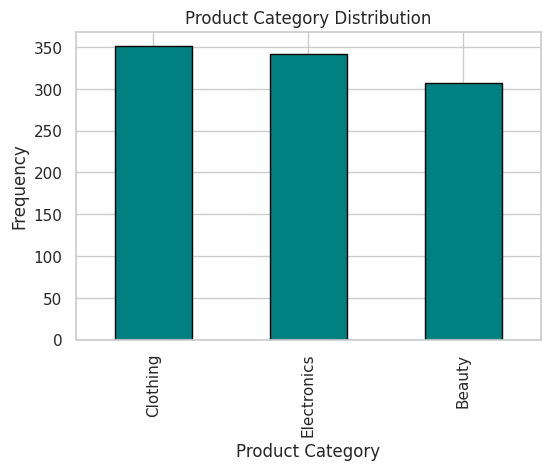

In [60]:
# Product Category Distribution
plt.figure(figsize=(6, 4))
retail_sales['Product Category'].value_counts().plot(kind='bar', color='teal', edgecolor='black')
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.show()

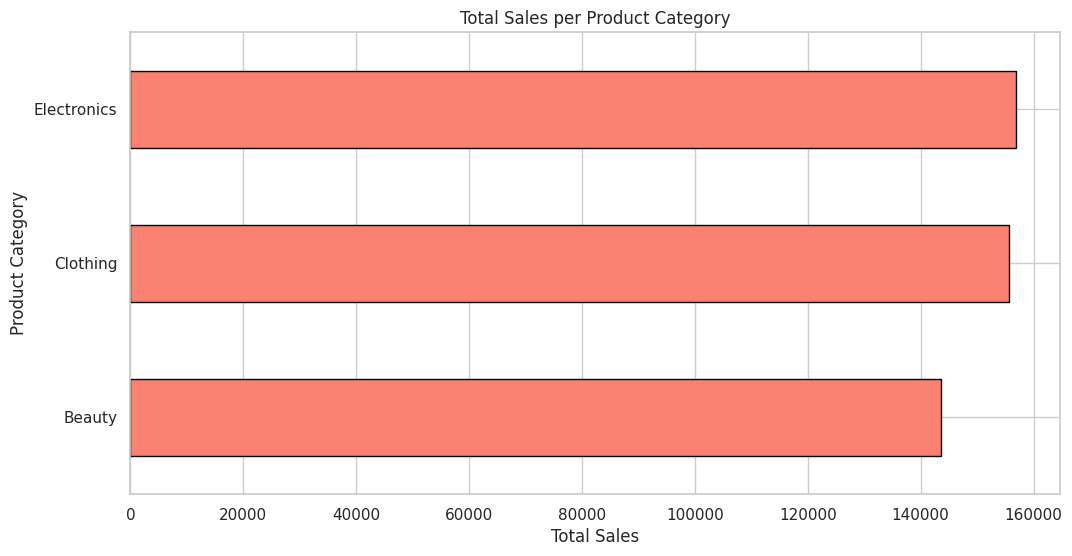

In [62]:
# Total Sales per Product Category
plt.figure(figsize=(12, 6))
total_sales_per_category = retail_sales.groupby('Product Category')['Total Amount'].sum()
total_sales_per_category.sort_values().plot(kind='barh', color='salmon', edgecolor='black')
plt.title('Total Sales per Product Category')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.show()

DATA VISUALISATION

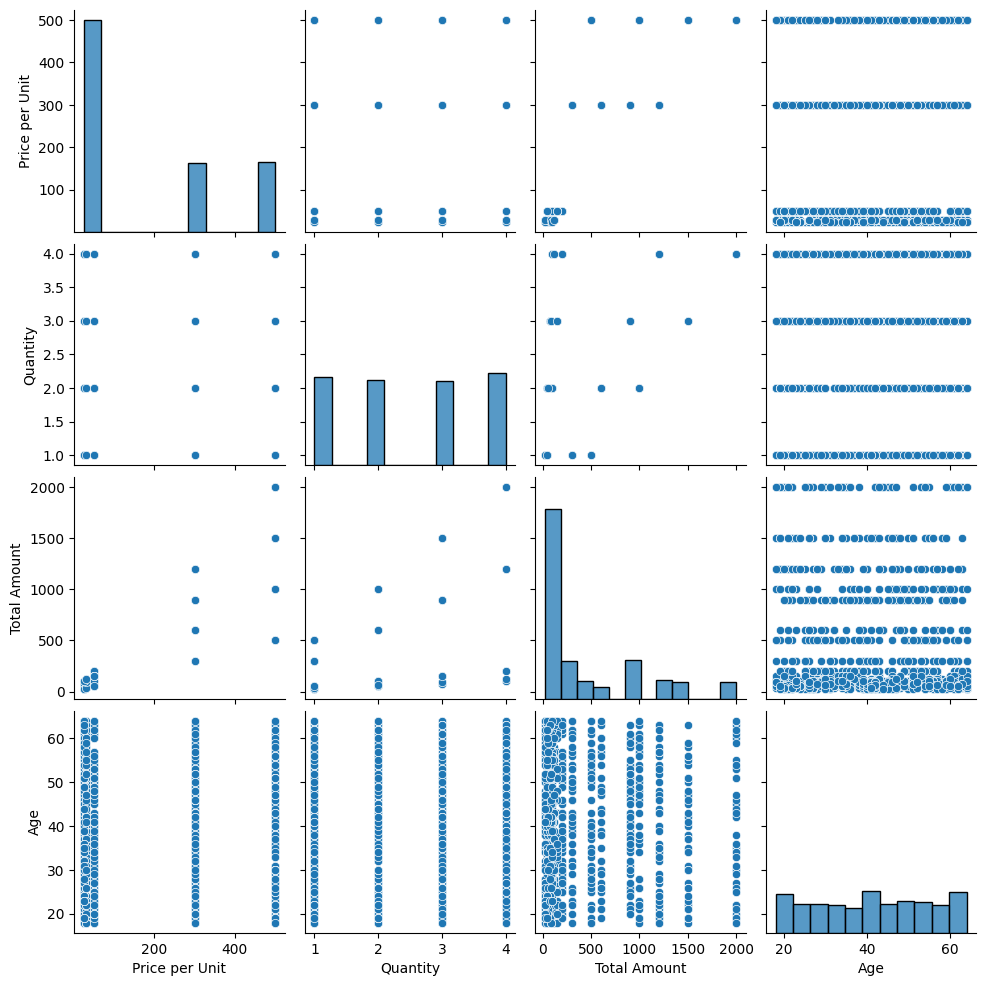

In [21]:
#Creating a pair plot to visualize relationships between multiple numerical features.
import seaborn as sns

# Pair plot
sns.pairplot(retail_sales[['Price per Unit', 'Quantity', 'Total Amount', 'Age']])
plt.show()


OUTLIER DETECTION

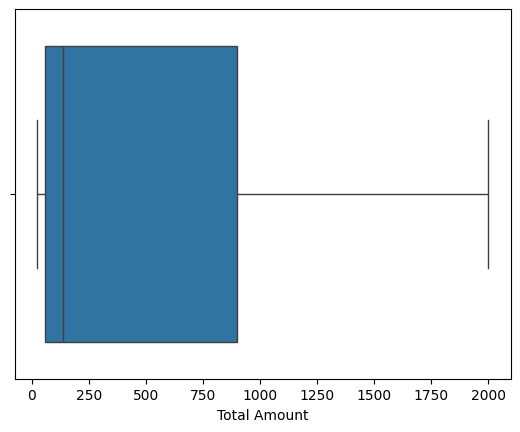

In [23]:
# Box plot for price
sns.boxplot(x=retail_sales['Total Amount'])
plt.show()
